# Example 2.1: SGD of a linear neuron

In [1]:
import torch
import numpy as np
import matplotlib.pylab as plt

In [2]:
# set parameters
no_epochs = 200
lr = 0.01

SEED = 10
np.random.seed(SEED)

In [3]:
# generate training data
X = 2*np.random.rand(6, 2) - 1
Y = np.dot(X, [2.53, -0.47]) + np.random.rand(6) - 0.5

print('X: {}'.format(X))
print('Y: {}'.format(Y))

X: [[ 0.54264129 -0.9584961 ]
 [ 0.26729647  0.49760777]
 [-0.00298598 -0.55040671]
 [-0.60387427  0.52106142]
 [-0.66177833 -0.82332037]
 [ 0.37071964  0.90678669]]
Y: [ 1.32732389  0.45457668  0.5637576  -1.66017471 -1.06558327  0.303607  ]


In [4]:
# class for a linear neuron
class Linear():
  def __init__(self):
    self.w = torch.tensor(np.random.rand(2), dtype=torch.double, requires_grad=True)
    self.b = torch.tensor(0., dtype=torch.double, requires_grad=True)

  def __call__(self, x):
    return torch.inner(torch.tensor(x) ,self.w) + self.b

In [21]:
# mean squared error as the loss function
loss_fn = torch.nn.MSELoss(reduction="sum")

The main function to train the neuron starts here

In [22]:
model = Linear()
print('w: {}, b: {}'.format(model.w.detach().numpy(), model.b.detach().numpy()))

w: [0.39180931 0.36678949], b: 0.0


In [26]:
# keep an index for training
idx = np.arange(len(X))

err = []
for epoch in range(no_epochs):
  np.random.shuffle(idx)
  X, Y = X[idx], Y[idx]
    
  err_ = []
  for p in np.arange(len(X)):
    
    y = model(X[p])
    loss_ = loss_fn(y, torch.tensor(Y[p]))
    
    loss_fn.zero_grad()
    loss_.backward()
    
    with torch.no_grad():
        model.w -= lr * model.w.grad
        model.b -= lr * model.b.grad
    
   model.w.grad = None
   model.b.grad = None
    
    with torch.no_grad():
        err_.append(loss_.numpy())
    
    # print values for the first iteration
        if epoch == 0:
          print('iter: {}'.format(epoch+1))
          print('p: {}'.format(p+1))
          print('x:{}, d:{}'.format(X[p], Y[p]))
          print('y: {}'.format(y.numpy()))
          print('se: {}'.format(loss_.numpy()))
          print('w: {}, b: {}'.format(model.w.detach().numpy(), model.b.detach().numpy()))
 
  err.append(np.mean(err_))
  if epoch%10 == 0:
        print('iter: %3d, mse: %1.4f'%(epoch, err[epoch]))

iter: 1
p: 1
x:[-0.66177833 -0.82332037], d:-1.0655832748853409
y: -1.0312615375622887
se: 0.0011779816528725954
w: [ 2.09825537 -0.44797458], b: -0.012960572693564031
iter: 1
p: 2
x:[0.37071964 0.90678669], d:0.30360700368844684
y: 0.3586865051608091
se: 0.0030337514824439536
w: [ 2.09830126 -0.44840834], b: -0.01474859746947232
iter: 1
p: 3
x:[-0.00298598 -0.55040671], d:0.5637575971042241
y: 0.22579288284892696
se: 0.11422014808166467
w: [ 2.09832696 -0.45256245], b: -0.009777327960274666
iter: 1
p: 4
x:[ 0.54264129 -0.9584961 ], d:1.3273238888598116
y: 1.5626408562314817
se: 0.05537407513299969
w: [ 2.09579881 -0.45220555], b: -0.009512397798510415
iter: 1
p: 5
x:[0.26729647 0.49760777], d:0.454576682526435
y: 0.3256662317159976
se: 0.016617904328150197
w: [ 2.09395981 -0.45056572], b: -0.006669258620537416
iter: 1
p: 6
x:[-0.60387427  0.52106142], d:-1.6601747069539354
y: -1.505930125434132
se: 0.0237913909282193
w: [ 2.09398369 -0.45053331], b: -0.0069110110729604865
iter:   0, m

In [17]:
# print learned weights
print('w: %s, b: %s'%(model.w.detach().numpy(), model.b.detach().numpy()))

w: [ 2.09775931 -0.447438  ], b: -0.012950336130465357


<function matplotlib.pyplot.show(close=None, block=None)>

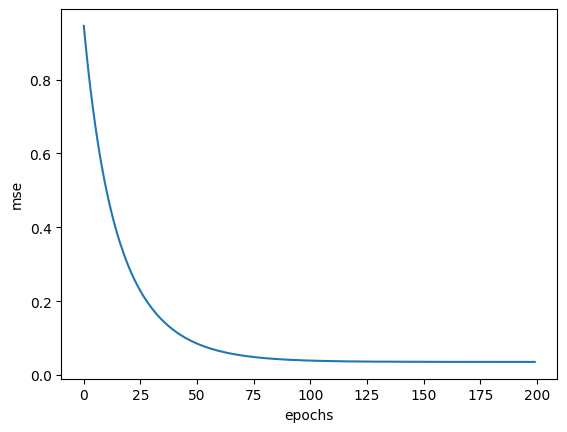

In [24]:
# print learning curve
plt.figure(1)
plt.plot(range(no_epochs), err)
plt.xlabel('epochs')
plt.ylabel('mse')
plt.show

In [28]:
pred = []
for p in np.arange(len(X)):
	pred.append(model(X[p]).detach().numpy())

print(pred)

[array(1.16778916), array(-0.25017005), array(0.10129384), array(-0.39039796), array(-1.51096182), array(-0.64760042)]


<function matplotlib.pyplot.show(close=None, block=None)>

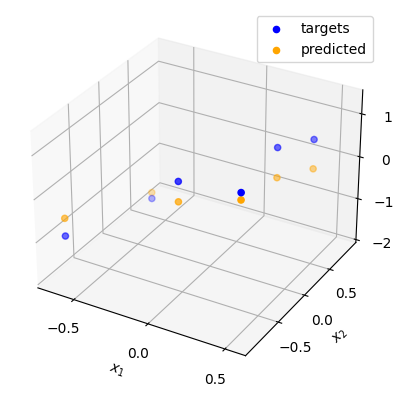

In [29]:
#print targets and predictions
fig = plt.figure(2)
ax = plt.axes(projection = '3d')
plot_original = ax.scatter(X[:,0], X[:,1], Y, c='blue', label='targets')
plot_pred = ax.scatter(X[:,0], X[:,1], pred, c='orange', label='predicted')
X1 = np.arange(-1, 1, 0.1)
X2 = np.arange(-1, 1, 0.1)
X1,X2 = np.meshgrid(X1,X2)
# Z = model.w.numpy()[0]*X1 + model.w.numpy()[1]*X2 + model.b.numpy()
# regression_plane = ax.scatter3D(X1, X2, Z)
ax.set_zticks([ -2, -1, 0, 1])
ax.set_xticks([-0.5, 0, 0.5])
ax.set_yticks([-0.5, 0, 0.5])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

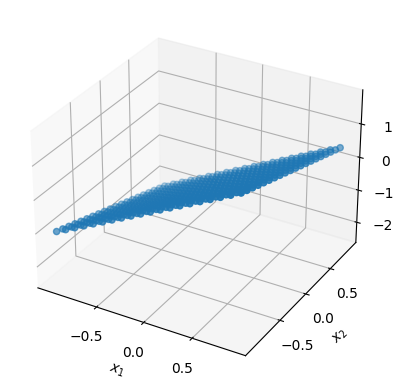

In [30]:
#print targets and predictions
fig = plt.figure(3)
ax = plt.axes(projection = '3d')
# plot_original = ax.scatter(X[:,0], X[:,1], Y, c='blue', label='targets')
# plot_pred = ax.scatter(X[:,0], X[:,1], pred, c='orange', label='predicted')
X1 = np.arange(-1, 1, 0.1)
X2 = np.arange(-1, 1, 0.1)
X1,X2 = np.meshgrid(X1,X2)
Z = model.w.detach().numpy()[0]*X1 + model.w.detach().numpy()[1]*X2 + model.b.detach().numpy()
regression_plane = ax.scatter3D(X1, X2, Z)
ax.set_zticks([ -2, -1, 0, 1])
ax.set_xticks([-0.5, 0, 0.5])
ax.set_yticks([-0.5, 0, 0.5])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
# plt.legend()
plt.show